### Exploration of credit card application data

#### In this notebook, data of credit card applications are cleaned and visualized

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set()

In [21]:
# Data Loading
df = pd.read_csv("dataset.csv")
df.head()

,Gender,Age,Debt,Married,BankCustomer,Education,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [22]:
df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [24]:
# Checking the number of unique values present in each feature of dataset
df.nunique()

Gender              3
Age               350
Debt              215
Married             4
BankCustomer        4
Education          15
Ethnicity          10
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           171
Income            240
ApprovalStatus      2
dtype: int64

### Handling missing and unknown values

In [28]:
# Checking the number of null values present in our dataset
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Education         0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [29]:
# Checking the counts of each unique value in 'Gender' column
df['Gender'].value_counts()

b    468
a    210
?     12
Name: Gender, dtype: int64

##### Although there is no null value present in our 'Gender' column, still there are 12 unknown values in the form of '?'. Thus, its important to check other columns for unknown values

In [34]:
print('Unknown values present in different columns: \n')
for col in df.columns:
    try: 
        print('{}  : {}'.format(col,df[col].value_counts().loc['?']))
    except:
        continue

Unknown values present in different columns: 

Gender  : 12
Age  : 12
Married  : 6
BankCustomer  : 6
Education  : 9
Ethnicity  : 9
ZipCode  : 13


In [35]:
# In 'Age' column, we will replace all the unknown values with the mean value
df['Age'].replace('?',np.nan, inplace=True)
df['Age'] = df['Age'].astype(np.float32)
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [36]:
# In other columns, we will use 'unknown' value as a unique feature for our columns
le = LabelEncoder()

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = list(set(df.columns) - set(numeric_cols))

for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

In [38]:
# Saving the cleaned csv in a new file
df.to_csv('cleaned_dataset.csv', index=False)

### Dataset Visualization using seaborn

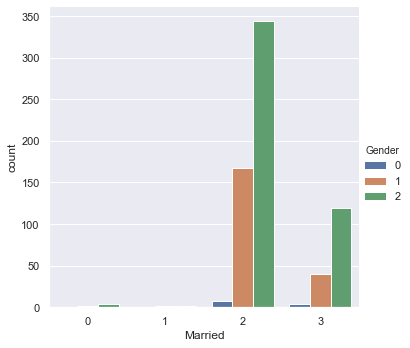

In [45]:
# Counts of married people in each gender
sns.factorplot('Married',data=df,hue='Gender',kind='count', size=5)
plt.show()

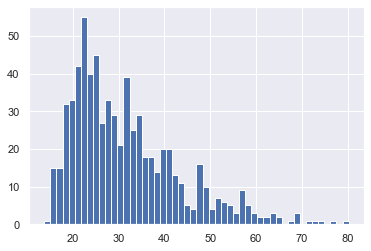

In [48]:
# Age distribution
df['Age'].hist(bins=50)
plt.show()

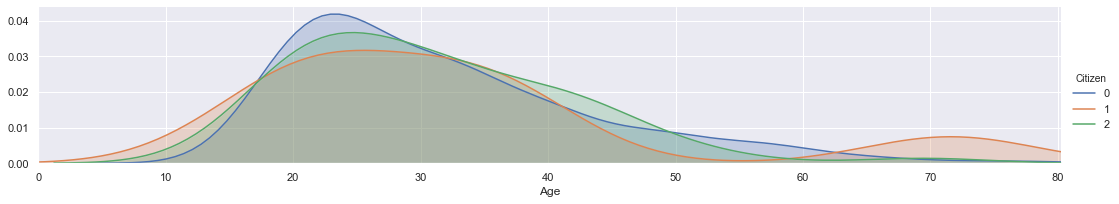

In [49]:
# Distribution of citizens base on age
as_fig = sns.FacetGrid(df,hue='Citizen',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest = df['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.show()

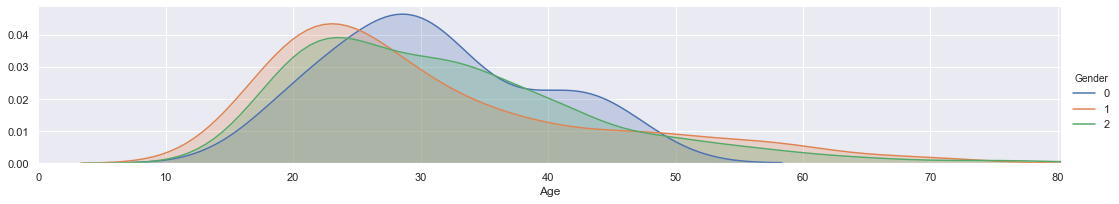

In [52]:
# Distribution of gender based on age
as_fig = sns.FacetGrid(df,hue='Gender',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest = df['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.show()

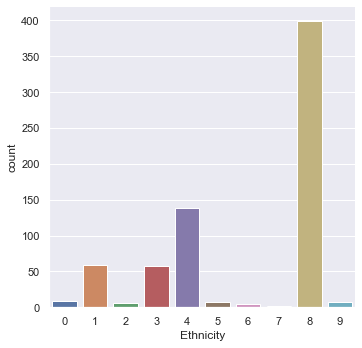

In [54]:
# Counts per ethnicity
sns.factorplot('Ethnicity',data=df,kind='count')
plt.show()

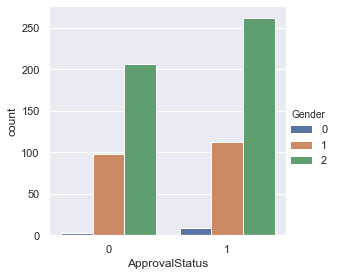

In [56]:
# Plotting approval status for each category of gender
sns.factorplot('ApprovalStatus',data=df,kind='count',hue='Gender',size=4)
plt.show()

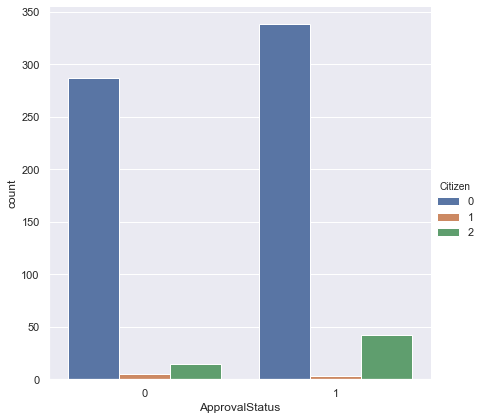

In [57]:
# Plotting approval status for each category of Citizen
sns.factorplot('ApprovalStatus',data=df,kind='count',hue='Citizen',size=6)
plt.show()

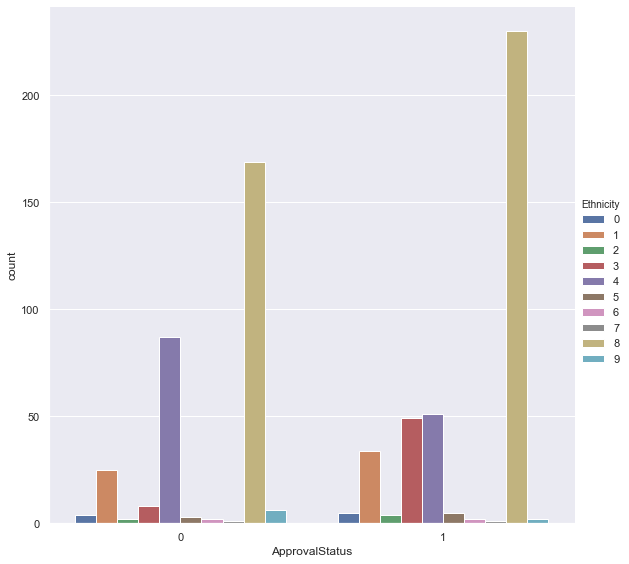

In [58]:
# Plotting approval status for each category of Ethnicity
sns.factorplot('ApprovalStatus',data=df,kind='count',hue='Ethnicity',size=8)
plt.show()

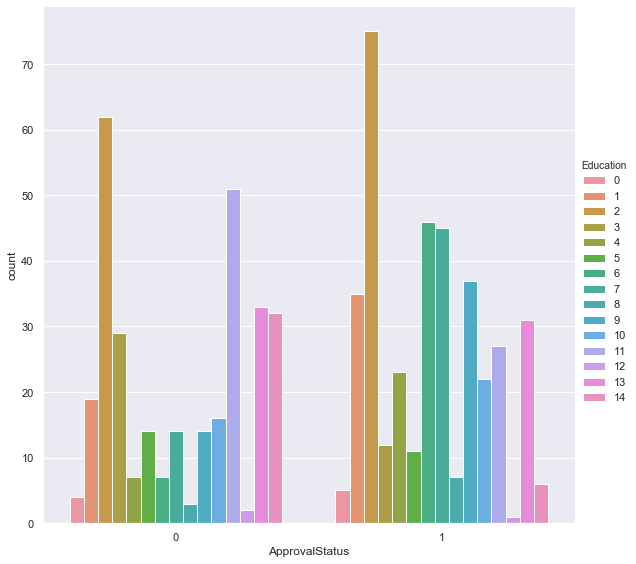

In [59]:
# Plotting approval status for each category of Education
sns.factorplot('ApprovalStatus',data=df,kind='count',hue='Education',size=8)
plt.show()

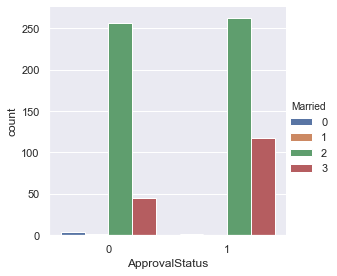

In [60]:
# Plotting approval status for each category of Married
sns.factorplot('ApprovalStatus',data=df,kind='count',hue='Married',size=4)
plt.show()

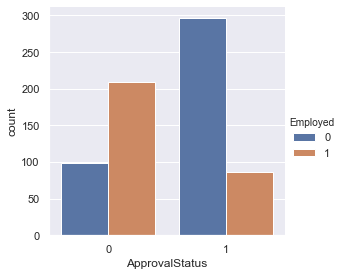

In [61]:
# Plotting approval status for each category of Employment
sns.factorplot('ApprovalStatus',data=df,kind='count',hue='Employed',size=4)
plt.show()

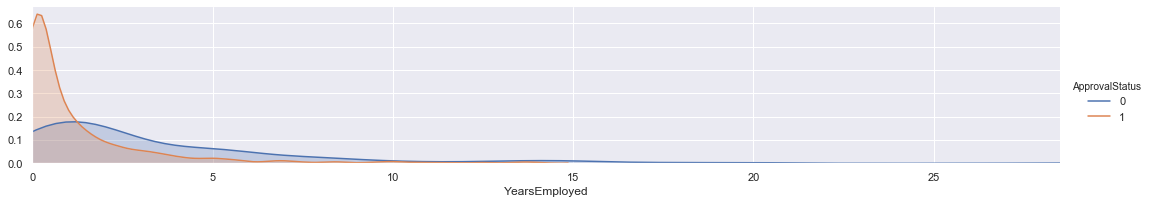

In [64]:
# Distribution of each approval status on Employed year
as_fig = sns.FacetGrid(df,hue='ApprovalStatus',aspect=5)
as_fig.map(sns.kdeplot,'YearsEmployed',shade=True)
oldest = df['YearsEmployed'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.show()

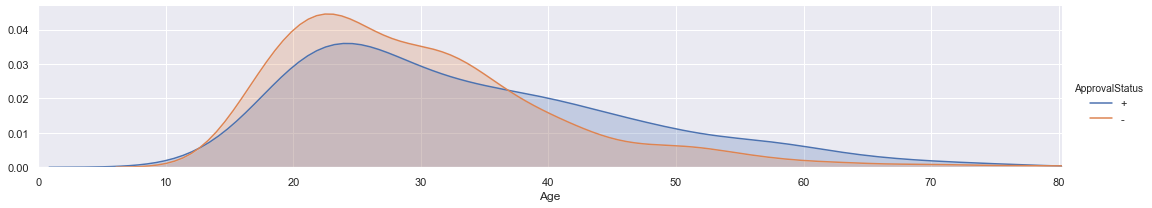

In [28]:
# Distribution of each approval status on age
as_fig = sns.FacetGrid(df,hue='ApprovalStatus',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest = df['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.show()

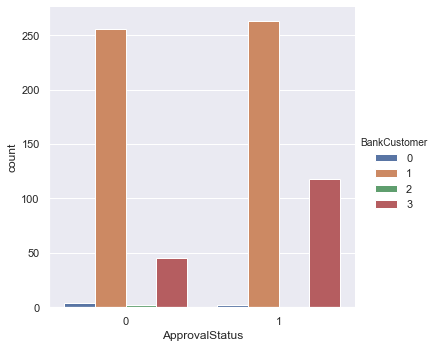

In [63]:
# Plotting approval status for each category of BankCustomer
sns.factorplot('ApprovalStatus',data=df,kind='count',hue='BankCustomer',size=5)
plt.show()